# Task One: Data preparation and customer analytics

## Objective

1. Analyze transaction and customer data to identify trends and inconsistencies
    - Retail Analytics
    - Understand the types of customers who purchase Chips and, 
    - Their purchasing behaviour within the region.
2. Develop Metrics and examine data drivers to gain insights into overall data performance
3. Create visualization and prepare findings to formulate a clear recommendation for the client's strategy


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Step 1: Exploratory Data Analysis

In [3]:
# Import Customer and transaction data for wrangling

customerData = pd.read_csv("./QVI_purchase_behaviour.csv")
transactionData = pd.read_excel("./QVI_transaction_data.xlsx")

In [4]:
# Displaying the first few rows of the customer data
print("Customer Data Head:")
print(customerData.head())

# Displaying the first few rows of the transaction data
print("\nTransaction Data Head:")
print(transactionData.head())

Customer Data Head:
   LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
0            1000   YOUNG SINGLES/COUPLES          Premium
1            1002   YOUNG SINGLES/COUPLES       Mainstream
2            1003          YOUNG FAMILIES           Budget
3            1004   OLDER SINGLES/COUPLES       Mainstream
4            1005  MIDAGE SINGLES/COUPLES       Mainstream

Transaction Data Head:
    DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0  43390          1            1000       1         5   
1  43599          1            1307     348        66   
2  43605          1            1343     383        61   
3  43329          2            2373     974        69   
4  43330          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  
0    Natural Chip        Compny SeaSalt175g         2        6.0  
1                  CCs Nacho Cheese    175g         3        6.3  
2    Smiths Crinkle Cut  Chips Chicken 170g         2     

In [5]:
## Inspect size of dataset
transactionData.shape

## Understand the dataset by showing the number of records in each column, type of data, whether any values are missing and how much memory the dataset uses.
transactionData.info()

## Statistical summary of data: count, mean, standard deviation, minimum and quartiles for each numerical column
transactionData.describe()

## Inspect list of Columns
transactionData.columns.to_list()

## Check Null Values
transactionData.isnull().sum()

## Checking for the duplicate values
transactionData.nunique()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


DATE                 364
STORE_NBR            272
LYLTY_CARD_NBR     72637
TXN_ID            263127
PROD_NBR             114
PROD_NAME            114
PROD_QTY               6
TOT_SALES            112
dtype: int64

In [6]:
# "DATE" is an Excel serial date. Convert to datetime objects
transactionData['DATE'] = pd.to_datetime(transactionData['DATE'], origin='1899-12-30', unit='D')
# transactionData['DATE'].head()


Analysis of Product Names `PROD_NAME`

In [7]:
# Get all word occurrence in products name and add them to a dataframe # Split all unique product names into words
productWords = pd.DataFrame(
    {'words': "".join(transactionData['PROD_NAME'].unique()).split()}
    )

# Remove all words with mixed chars and Keep only alphabetic words (remove anything with numbers or symbols)
cleanWords = productWords[productWords['words'].str.fullmatch(r'[a-zA-Z]+')]


In [8]:
# cleanWords.value_counts()
# Create a boolean column 'SALSA' that checks if 'salsa' is in the product name
transactionData['SALSA'] = transactionData['PROD_NAME'].str.lower().str.contains("salsa")

# Filter out rows where 'SALSA' is True and drop the 'SALSA' column
salsa_filter = transactionData['SALSA'] == False

transactionData = transactionData[salsa_filter]
# transactionData = transactionData[transactionData['SALSA'] == False].drop(columns=['SALSA'], inplace=True)

transactionData.drop(columns=['SALSA'], inplace=True)
transactionData.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246742,246742.000000,2.467420e+05,2.467420e+05,246742.000000,246742.000000,246742.000000
mean,2018-12-30 01:19:01.211467520,135.051098,1.355310e+05,1.351311e+05,56.351789,1.908062,7.321322
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,2018-09-30 00:00:00,70.000000,7.001500e+04,6.756925e+04,26.000000,2.000000,5.800000
50%,2018-12-30 00:00:00,130.000000,1.303670e+05,1.351830e+05,53.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.000000,2.030840e+05,2.026538e+05,87.000000,2.000000,8.800000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000
std,NaN,76.787096,8.071528e+04,7.814772e+04,33.695428,0.659831,3.077828


In [9]:
# Identify transactions where product quantity is 200 (outlier)
outlier_transactions = transactionData['PROD_QTY'] == 200
# transactionData[outlier_transactions]['LYLTY_CARD_NBR'].iloc[0]
outl_cust_id = transactionData[outlier_transactions]['LYLTY_CARD_NBR'].iloc[0]

outl_filter = transactionData['LYLTY_CARD_NBR'] != outl_cust_id

transactionData = transactionData[outl_filter]

transactionData.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246740,246740.000000,2.467400e+05,2.467400e+05,246740.000000,246740.000000,246740.000000
mean,2018-12-30 01:18:58.448569344,135.050361,1.355303e+05,1.351304e+05,56.352213,1.906456,7.316113
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,2018-09-30 00:00:00,70.000000,7.001500e+04,6.756875e+04,26.000000,2.000000,5.800000
50%,2018-12-30 00:00:00,130.000000,1.303670e+05,1.351815e+05,53.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.000000,2.030832e+05,2.026522e+05,87.000000,2.000000,8.800000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000
std,NaN,76.786971,8.071520e+04,7.814760e+04,33.695235,0.342499,2.474897


In [10]:
transactions_by_date = transactionData.groupby('DATE').size().reset_index(name='N')
transactions_by_date
allDates = pd.DataFrame(pd.date_range(start='2018-07-01', end='2019-06-30'), columns=['DATE'])
allDates
# print(f"transactions_by_day: {transactions_by_day['DATE'].dtypes}"
# transactionData['DATE'] = pd.to_datetime(transactionData['DATE'])
# print(f"transaction: {transactionData['DATE'].dtypes}")
transactions_by_day = allDates.merge(transactions_by_date, on='DATE', how="left")

# transactionData['DATE'].value_counts()
# transactionData.describe()

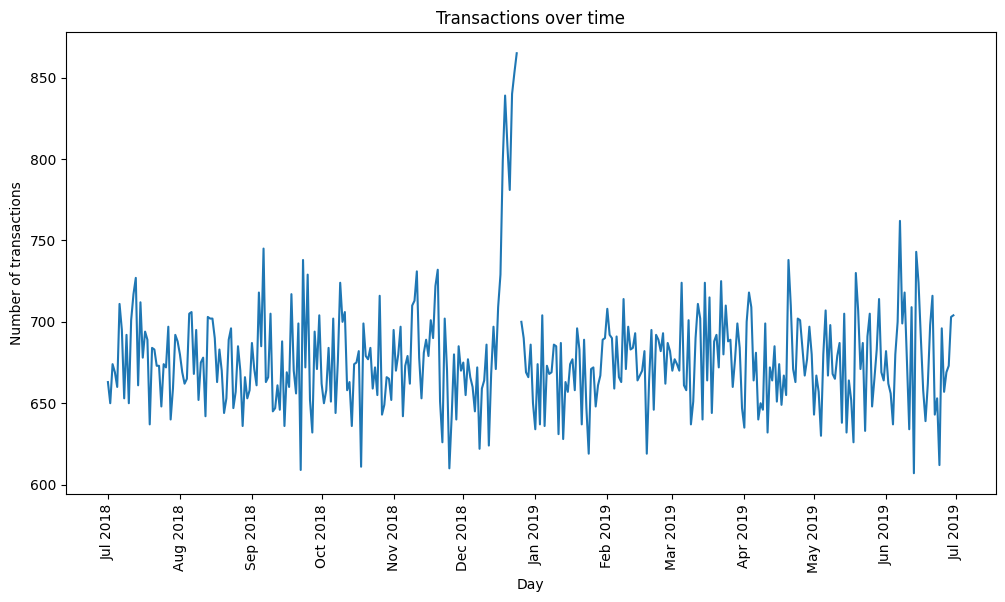

In [11]:
import matplotlib.dates as mdates

plt.figure(figsize=(12, 6))
plt.plot(transactions_by_day['DATE'], transactions_by_day['N'])

plt.xlabel("Day")
plt.ylabel("Number of transactions")
plt.title("Transactions over time")

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=90);

plt.savefig('./Quantium/Transactions over time.png')



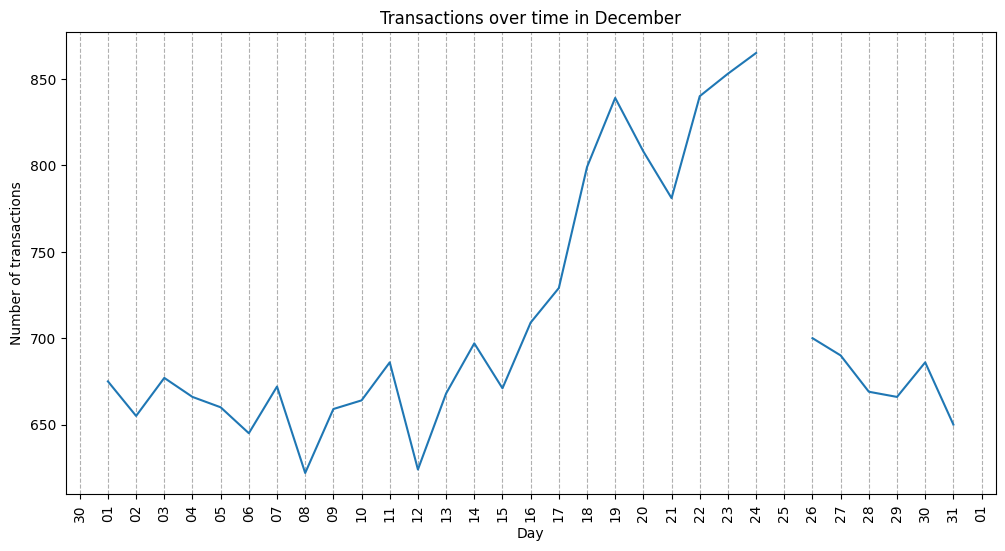

In [12]:
# Zoom in on December
transactions_in_dec = transactions_by_day[transactions_by_day["DATE"].dt.month == 12]

plt.figure(figsize=(12, 6))
plt.plot(transactions_in_dec['DATE'], transactions_in_dec['N'])

plt.grid(axis='x', linestyle='--')

plt.xlabel("Day")
plt.ylabel("Number of transactions")
plt.title("Transactions over time in December")


plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d'))
plt.xticks(rotation=90);

plt.savefig('./Quantium/Transactions over time in December.png')

We can see that the increase in data occurs in the lead-up to Christmas and that there are zero sales on Christmas day itself. This is due to shops being closed on Christmas day.


In [13]:
transactionData['PACK_SIZE'] = transactionData['PROD_NAME'].str.extract(r'(\d+)', expand=True).astype(int)
# transactionData['PACK_SIZE'].describe()
transactionData['PACK_SIZE'].head(10)

0     175
1     175
2     170
3     175
4     150
6     330
7     210
8     150
9     210
10    330
Name: PACK_SIZE, dtype: int64

In [14]:
transactionData['PACK_SIZE'].value_counts()

PACK_SIZE
175    66390
150    40203
134    25102
110    22387
170    19983
165    15297
330    12540
380     6416
270     6285
210     6272
200     4473
135     3257
250     3169
90      3008
190     2995
160     2970
220     1564
70      1507
180     1468
125     1454
Name: count, dtype: int64

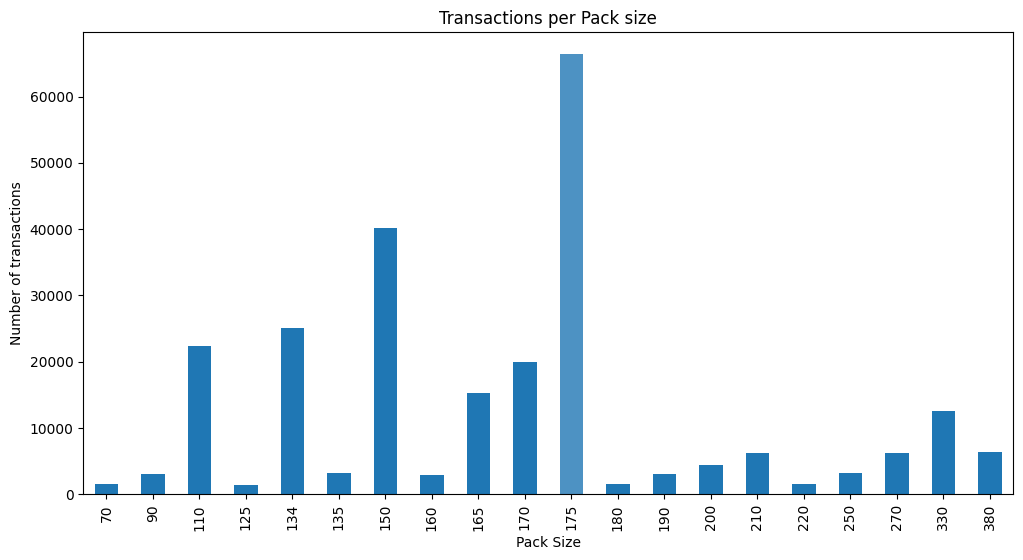

In [15]:

pack_counts = transactionData['PACK_SIZE'].sort_values().value_counts(sort=False)
max_index = pack_counts.idxmax()

# Set colors: use a distinct color for the tallest bar
colors = ['#1f77b4' if idx != max_index else "#1f76b4cb" for idx in pack_counts.index]

plt.figure(figsize=(12, 6))
pack_counts.plot(
    kind="bar",
    color=colors,
    ylabel="Number of transactions",
    xlabel="Pack Size",
    title="Transactions per Pack size"
)

plt.savefig('./Quantium/Transactions per Pack size.png')
plt.show();



In [16]:

transactionData['BRAND_NAME'] = transactionData['PROD_NAME'].str.split(
    " ", expand=True)[0]
# # # transactionData.head()

# # # Clean Brand names
brand_mapping = {
    r"\bDorito\b": "Doritos",
    "RED": "RRD",
    "Red": "RRD",
    "INFZNS": "Infuzions",
    "Infzns": "Infuzions",
    "SMITH": "Smiths",
    "GRNWAVS": "GrnWaves",
    "GrnWves": "GrnWaves",
    "Grain": "GrnWaves",
    "NCC": "Natural",
    "NATURAL": "Natural",
    "WW": "Woolworths",
    "SNBTS": "Sunbites",
    "Snbts": "Sunbites",
    "SUNBITES": "Sunbites"
}


transactionData['BRAND_NAME'] = transactionData['BRAND_NAME'].replace(
    brand_mapping, regex=True)
transactionData['BRAND_NAME'].value_counts()

BRAND_NAME
Kettle        41288
Smiths        27390
Doritos       25224
Pringles      25102
RRD           16321
Infuzions     14201
Thins         14075
Woolworths    11836
Cobs           9693
Tostitos       9471
Twisties       9454
GrnWaves       7740
Natural        7469
Tyrrells       6442
Cheezels       4603
CCs            4551
Sunbites       3008
Smith          2963
Cheetos        2927
Burger         1564
French         1418
Name: count, dtype: int64

Customer Exploratory Data

In [17]:
data = transactionData.merge(customerData, on='LYLTY_CARD_NBR')
data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND_NAME,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,Smiths,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,Kettle,MIDAGE SINGLES/COUPLES,Budget


In [18]:
# Check if the new data contains a null
data.info()
data.isnull().sum()

data.to_csv("./Quantium/QVI_data.csv", index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246740 entries, 0 to 246739
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              246740 non-null  datetime64[ns]
 1   STORE_NBR         246740 non-null  int64         
 2   LYLTY_CARD_NBR    246740 non-null  int64         
 3   TXN_ID            246740 non-null  int64         
 4   PROD_NBR          246740 non-null  int64         
 5   PROD_NAME         246740 non-null  object        
 6   PROD_QTY          246740 non-null  int64         
 7   TOT_SALES         246740 non-null  float64       
 8   PACK_SIZE         246740 non-null  int64         
 9   BRAND_NAME        246740 non-null  object        
 10  LIFESTAGE         246740 non-null  object        
 11  PREMIUM_CUSTOMER  246740 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(6), object(4)
memory usage: 22.6+ MB


## Data analysis on customer segments 

- Who spends the most on chips (total data), describing customers by lifestage and how premium their general purchasing behaviour is
- How many customers are in each segment
- How many chips are bought per customer by segment
- What's the average chip price by customer segment
- The customer’s total spend over the period and total spend for each transaction to understand what proportion of their grocery spend is on chips
- Proportion of customers in each customer segment overall to compare against the mix of customers who purchase chips

In [19]:
customerData['PREMIUM_CUSTOMER'].value_counts()

PREMIUM_CUSTOMER
Mainstream    29245
Budget        24470
Premium       18922
Name: count, dtype: int64

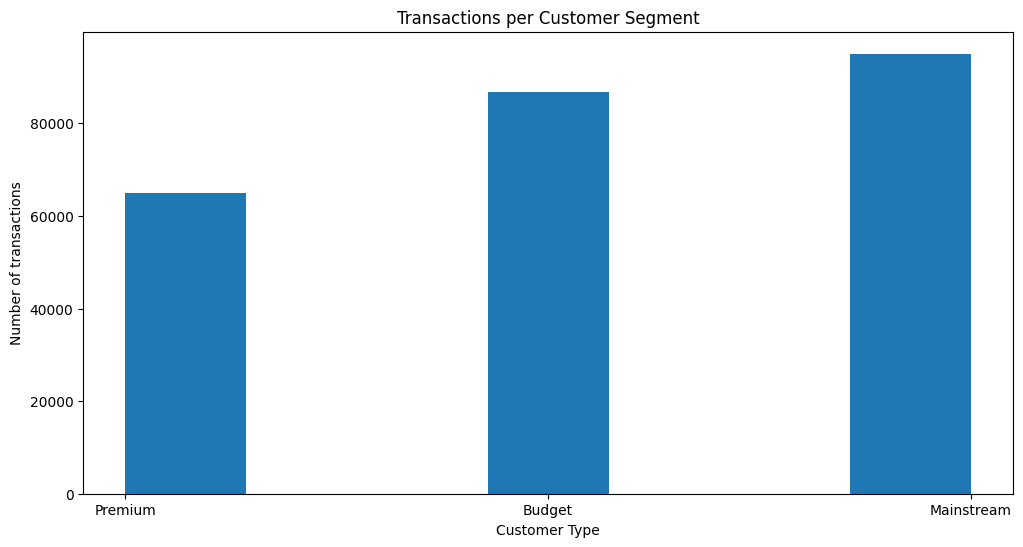

In [20]:
### Total data by PREMIUM_CUSTOMER transactions
plt.figure(figsize=(12, 6))

plt.hist(data['PREMIUM_CUSTOMER'], bins=7)

plt.xlabel("Customer Type")
plt.ylabel("Number of transactions")
plt.title("Transactions per Customer Segment");

plt.savefig('./Quantium/Transactions per Customer Segment.png')



### Who spends the most on chips (total sales), describing customers by lifestage and how premium their purchasing behaviour is?

In [21]:
sales_by_lifestage = (
    data.groupby(['LIFESTAGE'], observed=True)['TOT_SALES']
    .sum()
    .reset_index(name='TOTAL_SALES')
    .sort_values(by='TOTAL_SALES', ascending=False)
)
sales_by_lifestage

,LIFESTAGE,TOTAL_SALES
3,OLDER SINGLES/COUPLES,376019.65
4,RETIREES,342381.90
2,OLDER FAMILIES,328519.90
5,YOUNG FAMILIES,294627.90
6,YOUNG SINGLES/COUPLES,243756.60
0,MIDAGE SINGLES/COUPLES,172523.80
1,NEW FAMILIES,47347.95


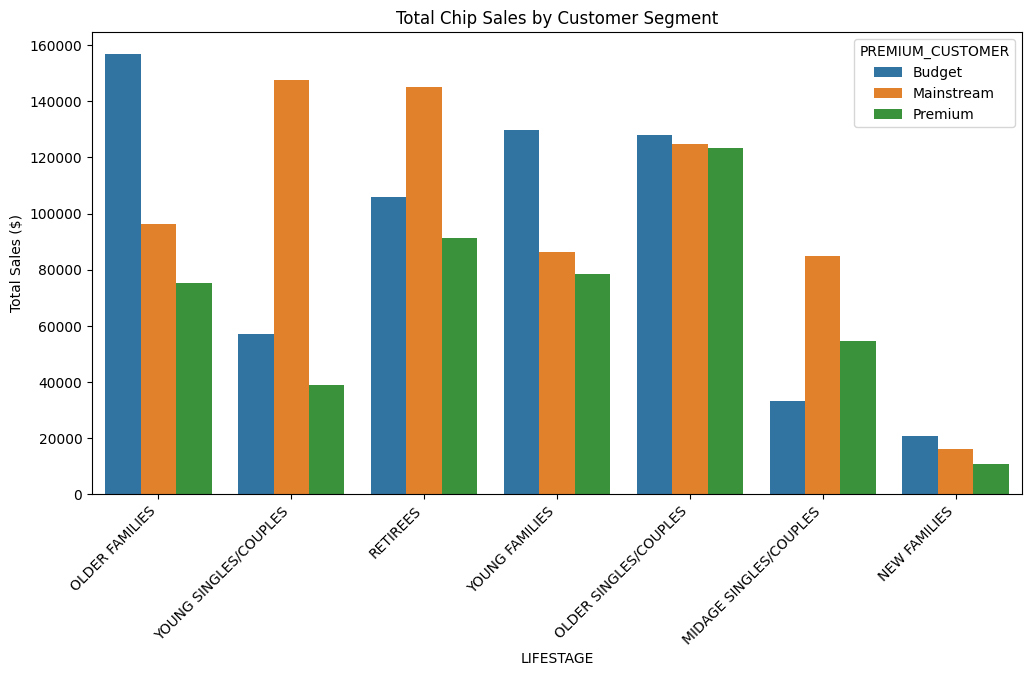

In [22]:
# Aggregate Sales by LIFESTAGE and PREMIUM_CUSTOMER
sales_by_lifestage_segment = (
    data.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE'], observed=True)['TOT_SALES']
    .sum()
    .reset_index(name='TOTAL_SALES')
    .sort_values(by='TOTAL_SALES', ascending=False)
)

# Create grouped bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=sales_by_lifestage_segment, 
            x='LIFESTAGE', 
            y='TOTAL_SALES', 
            hue='PREMIUM_CUSTOMER')

# Customize the plot
plt.title("Total Chip Sales by Customer Segment")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=45, ha='right')

plt.savefig('./Quantium/Total chip sold by customer segment.png')
plt.show();

### How many chips are bought per customer by segment?

In [23]:
# Compute overall total sales
total_sales_overall = data['TOT_SALES'].sum()

# Include a proportion column to our sales by segment
sales_by_lifestage_segment['PROPORTION'] = (sales_by_lifestage_segment['TOTAL_SALES'] / total_sales_overall * 100)

# Sort LIFESTAGE by total sales
lifestage_order = (
    sales_by_lifestage_segment.groupby('LIFESTAGE', observed=True)['TOTAL_SALES']
    .sum()
    .sort_values(ascending=False)
    .index
    .tolist()
)
sales_by_lifestage_segment['LIFESTAGE'] = pd.Categorical(
    sales_by_lifestage_segment['LIFESTAGE'], categories=lifestage_order, ordered=True
    )
sales_by_lifestage_segment = sales_by_lifestage_segment.sort_values('LIFESTAGE')

# 3. Create Stacked Bar Chart using Plotly Express
fig = px.bar(
    sales_by_lifestage_segment,
    x='LIFESTAGE',
    y='PROPORTION',
    color='PREMIUM_CUSTOMER',
    text=sales_by_lifestage_segment['PROPORTION'].round(1).astype(str) + '%',
    title='Total sales by LIFESTAGE and CUSTOMER SEGMENT',
    labels={'PROPORTION': 'Proportion of Sales (%)'},
    color_discrete_sequence=['#1f77b4', '#ff7f0e', '#2ca02c'],
    height=600,
    width=1000
)

# Customize layout
fig.update_traces(textposition='inside')
fig.update_layout(
    barmode='stack',
    xaxis_title='Lifestage',
    yaxis_title='Percentage of Total Sales',
    legend_title='Customer Segment',
)

fig.update_layout(
    updatemenus=[
        dict(
            buttons=[
                dict(
                    label="All", method="restyle", args=[
                        {"visible": [True] * len(sales_by_lifestage_segment['PREMIUM_CUSTOMER'].unique())}
                        ]
                    ),
                *[
                    dict(label=customer,
                         method="restyle",
                         args=[{"visible": [customer == val for val in sales_by_lifestage_segment['PREMIUM_CUSTOMER']]}])
                    for customer in sales_by_lifestage_segment['PREMIUM_CUSTOMER'].unique()
                ]
            ],
            direction="down",
            showactive=True,
            x=1.02,
            y=0.75,
            xanchor='left',
            yanchor='top'
        )
    ]
)

plt.savefig('./Quantium/Total Sale percentage.png')
fig.show();

<Figure size 640x480 with 0 Axes>

### How many customers are in each segment?

PREMIUM_CUSTOMER  LIFESTAGE             
Premium           NEW FAMILIES               575
Mainstream        NEW FAMILIES               830
Budget            NEW FAMILIES              1087
                  MIDAGE SINGLES/COUPLES    1474
Premium           OLDER FAMILIES            2231
                  MIDAGE SINGLES/COUPLES    2369
                  YOUNG FAMILIES            2398
                  YOUNG SINGLES/COUPLES     2480
Mainstream        YOUNG FAMILIES            2685
                  OLDER FAMILIES            2788
                  MIDAGE SINGLES/COUPLES    3298
Budget            YOUNG SINGLES/COUPLES     3647
Premium           RETIREES                  3812
Budget            YOUNG FAMILIES            3953
                  RETIREES                  4385
                  OLDER FAMILIES            4611
Premium           OLDER SINGLES/COUPLES     4682
Budget            OLDER SINGLES/COUPLES     4849
Mainstream        OLDER SINGLES/COUPLES     4858
                  RETIREES  

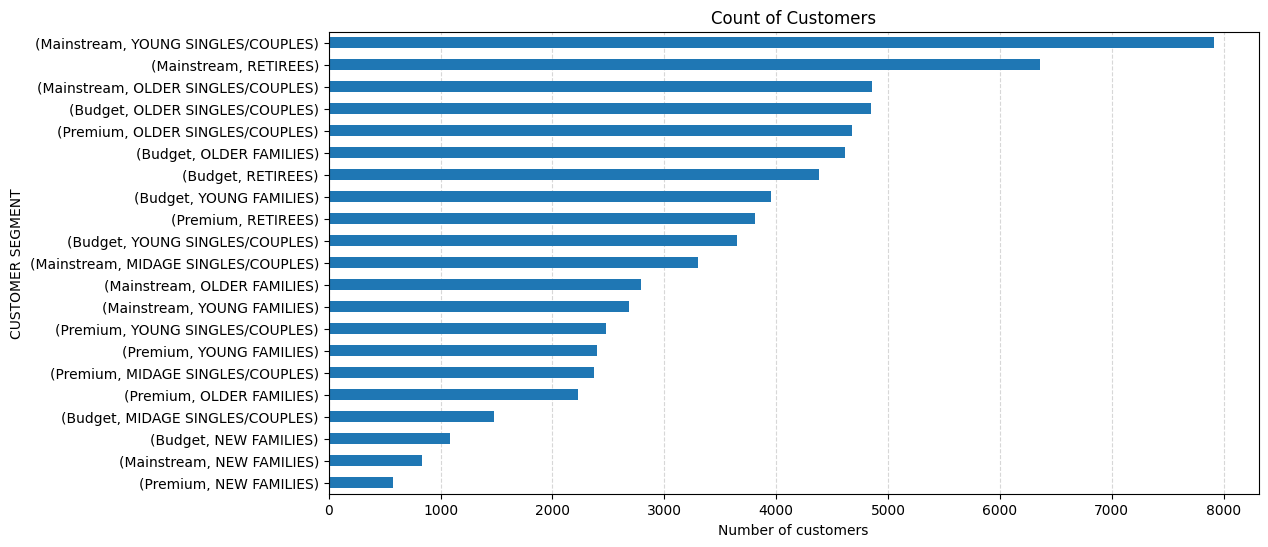

In [24]:
customer_segment = data.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE'], observed=True)['LYLTY_CARD_NBR'].nunique().sort_values()
print(customer_segment)

fig, ax = plt.subplots(figsize=(12, 6))
customer_segment.plot(
    kind="barh",
    ax=ax,
    xlabel="Number of customers",
    ylabel="CUSTOMER SEGMENT",
    title="Count of Customers",
    rot=0
);

ax.set_axisbelow(True)
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.savefig('./Quantium/Customer group group.png')



In [25]:
# Count unique customers per segment (PREMIUM_CUSTOMER and LIFESTAGE combination)
customers = (
    data.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE'], observed=True)['LYLTY_CARD_NBR']
    .nunique()
    .reset_index(name='CUSTOMERS')
)

# Compute proportion of customers per segment (out of total unique customers)
total_customers = customers['CUSTOMERS'].sum()
customers['PROPORTION'] = customers['CUSTOMERS'] / total_customers * 100


# Sort LIFESTAGE by total customers for better visualization order
lifestage_order = (
    customers.groupby('LIFESTAGE')['CUSTOMERS']
    .sum()
    .sort_values(ascending=False)
    .index
    .tolist()
)

# Convert 'LIFESTAGE' column to a Categorical type with the defined order
customers['LIFESTAGE'] = pd.Categorical(
    customers['LIFESTAGE'], categories=lifestage_order, ordered=True)

# Sort the DataFrame by the ordered 'LIFESTAGE'
customers = customers.sort_values('LIFESTAGE')


# Create Stacked Bar Chart using Plotly Express
fig = px.bar(
    customers,
    x='LIFESTAGE',
    y='PROPORTION',
    color='PREMIUM_CUSTOMER',

    text=customers['PROPORTION'].round(1).astype(str) + '%',
    title='Proportion of Customers by Lifestage and Premium Customer Flag',

    labels={
        'PROPORTION': 'Proportion of Customers (%)',
        'LIFESTAGE': 'Lifestage',
        'PREMIUM_CUSTOMER': 'Customer Segment'
    },
    color_discrete_sequence=['#1f77b4', '#ff7f0e', '#2ca02c'],
    height=600,
    width=1000
)

# Customize layout
fig.update_traces(textposition='inside')
fig.update_layout(
    barmode='stack',
    xaxis_title='Lifestage',
    yaxis_title='Customer Segment Percentage [%]',
    legend_title='Customer Segment',
)

fig.update_layout(
    updatemenus=[
        dict(
            buttons=[
                dict(
                    label="All",
                    method="restyle",
                    args=[{"visible": [True] *
                           len(customers['PREMIUM_CUSTOMER'].unique())}]
                ),
                *[
                    dict(label=customer,
                         method="restyle",
                         args=[
                             {"visible": [customer == val for val in customers['PREMIUM_CUSTOMER']]}]
                         )
                    for customer in customers['PREMIUM_CUSTOMER'].unique()
                ]
            ],
            direction="down",
            showactive=True,
            x=1.02,
            y=0.75,
            xanchor='left',
            yanchor='top'
        )
    ]
)

plt.savefig('./Quantium/Proportion of Customers.png')
fig.show()

<Figure size 640x480 with 0 Axes>

### What's the Average number of units per customer by LIFESTAGE and PREMIUM_CUSTOMER

In [26]:
# Average number of units per customer by LIFESTAGE and PREMIUM_CUSTOMER
avg_unit_by_segment = (
    data.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE'])
    .agg(AVG_UNITS=('PROD_QTY', 'sum'), UNIQUE_CUSTOMERS=('LYLTY_CARD_NBR', pd.Series.nunique))
    .assign(AVG_PROD_QTY=lambda df: (df['AVG_UNITS'] / df['UNIQUE_CUSTOMERS']).round(2))
    .sort_values(by='AVG_PROD_QTY', ascending=False)
)
avg_unit_by_segment


,,AVG_UNITS,UNIQUE_CUSTOMERS,AVG_PROD_QTY
PREMIUM_CUSTOMER,LIFESTAGE,,,
Mainstream,OLDER FAMILIES,25804,2788,9.26
Budget,OLDER FAMILIES,41853,4611,9.08
Premium,OLDER FAMILIES,20239,2231,9.07
Budget,YOUNG FAMILIES,34482,3953,8.72
Premium,YOUNG FAMILIES,20901,2398,8.72
Mainstream,YOUNG FAMILIES,23194,2685,8.64
Budget,OLDER SINGLES/COUPLES,32883,4849,6.78
Premium,OLDER SINGLES/COUPLES,31695,4682,6.77
Mainstream,OLDER SINGLES/COUPLES,32607,4858,6.71


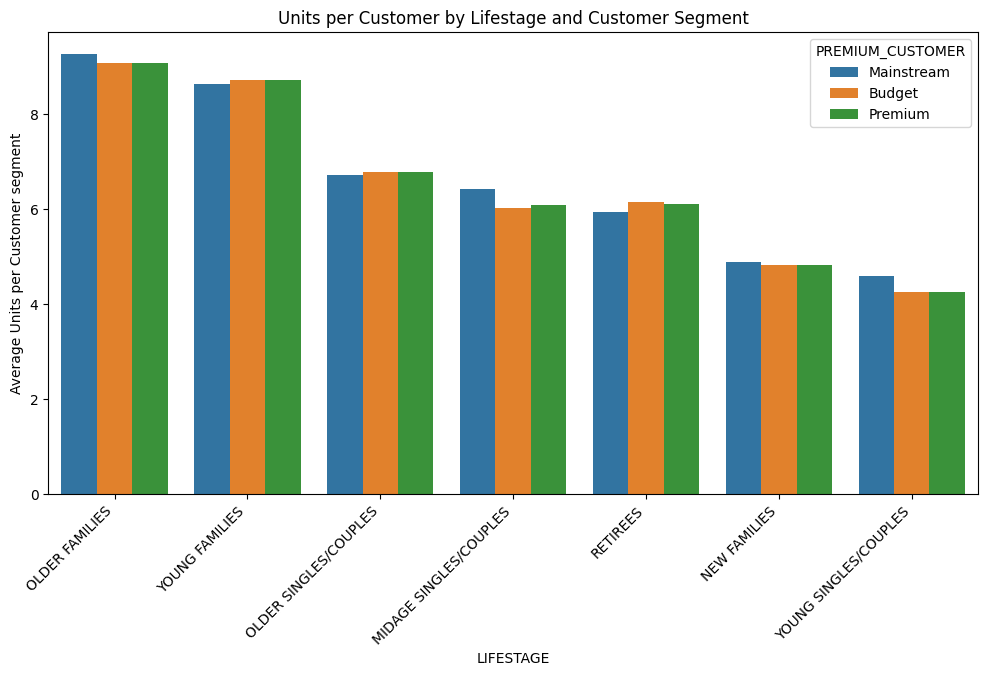

In [27]:
# Create grouped bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_unit_by_segment, 
            x='LIFESTAGE', 
            y='AVG_PROD_QTY', 
            hue='PREMIUM_CUSTOMER')

# Customize the plot
plt.title("Units per Customer by Lifestage and Customer Segment")
plt.ylabel("Average Units per Customer segment")
plt.xticks(rotation=45, ha='right')
plt.savefig('./Quantium/Units per Liftage and customer segment.png')
plt.show();

### What's the average chip price by customer segment (Average price per unit by LIFESTAGE and PREMIUM_CUSTOMER)

In [28]:
avg_chip_price_by_segment = (
    data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])
    .agg(AVG_UNITS=('PROD_QTY', 'sum'), TOTAL_SALES=('TOT_SALES', 'sum'))
    .assign(AVG_CHIP_PRICE=lambda df: (df['TOTAL_SALES'] / df['AVG_UNITS']).round(2))
    .sort_values(by='AVG_CHIP_PRICE', ascending=False)
)
avg_chip_price_by_segment

,,AVG_UNITS,TOTAL_SALES,AVG_CHIP_PRICE
LIFESTAGE,PREMIUM_CUSTOMER,,,
YOUNG SINGLES/COUPLES,Mainstream,36225,147582.20,4.07
MIDAGE SINGLES/COUPLES,Mainstream,21213,84734.25,3.99
NEW FAMILIES,Mainstream,4060,15979.70,3.94
RETIREES,Budget,26932,105916.30,3.93
NEW FAMILIES,Budget,5241,20607.45,3.93
RETIREES,Premium,23266,91296.65,3.92
OLDER SINGLES/COUPLES,Premium,31695,123537.55,3.90
NEW FAMILIES,Premium,2769,10760.80,3.89
OLDER SINGLES/COUPLES,Budget,32883,127833.60,3.89


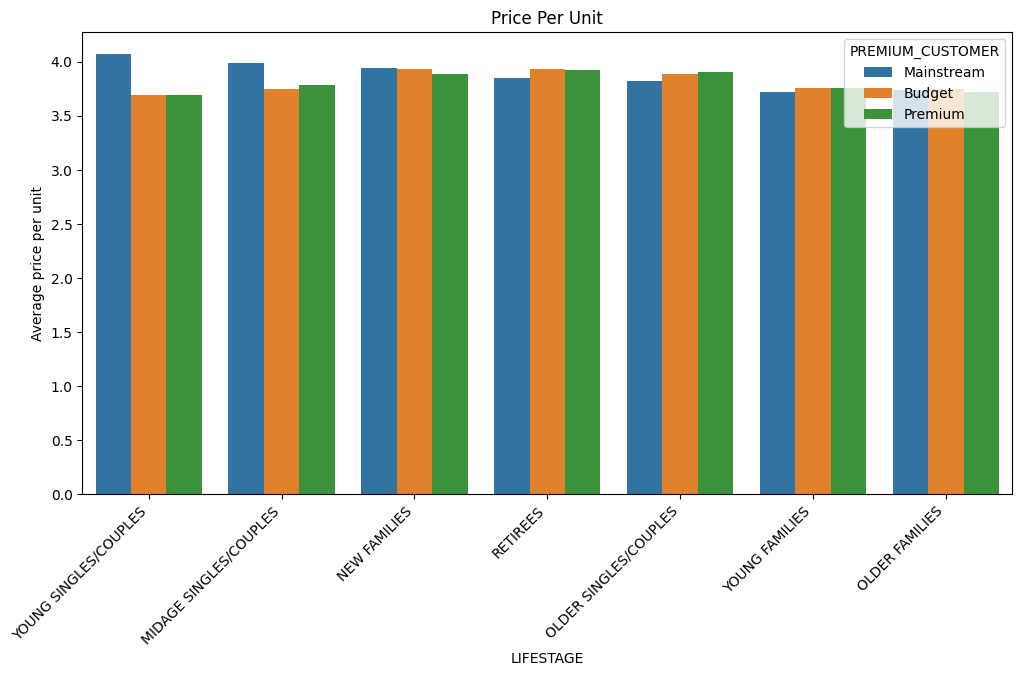

In [29]:
# Create grouped bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_chip_price_by_segment, 
            x='LIFESTAGE', 
            y='AVG_CHIP_PRICE', 
            hue='PREMIUM_CUSTOMER')

# Customize the plot
plt.title("Price Per Unit")
plt.ylabel("Average price per unit")
plt.xticks(rotation=45, ha='right')
plt.savefig('./Quantium/Average price per unit.png')
plt.show();

In [30]:
## Most Valueable Customers
top_five_customer = data.groupby([ 'LIFESTAGE']).agg(TOTAL_SPEND=('TOT_SALES', 'sum')).sort_values(by="TOTAL_SPEND", ascending=False).head()
top_five_customer
# data.groupby(['LYLTY_CARD_NBR', 'PREMIUM_CUSTOMER', 'LIFESTAGE']).agg(TOTAL_SPEND=('PROD_QTY', 'sum')).sort_values(by="TOTAL_SPEND", ascending=False).head()

,TOTAL_SPEND
LIFESTAGE,
OLDER SINGLES/COUPLES,376019.65
RETIREES,342381.90
OLDER FAMILIES,328519.90
YOUNG FAMILIES,294627.90
YOUNG SINGLES/COUPLES,243756.60


Computes affinity score:

$\text{Affinity} = \frac{\text{Target Segment Share}}{\text{Other Segment Share}}$
​
 
Values > 1: brand is overrepresented in the segment

Values < 1: brand is less popular in the segment

In [31]:
young_singles_couples_mainstream = (data["LIFESTAGE"] == "YOUNG SINGLES/COUPLES") & (data["PREMIUM_CUSTOMER"] == "Mainstream")
segment1 = data.loc[young_singles_couples_mainstream]
other = data.loc[~young_singles_couples_mainstream]
other.head()
# segment1.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND_NAME,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,Smiths,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,Kettle,MIDAGE SINGLES/COUPLES,Budget


In [32]:
quantity_segment = segment1['PROD_QTY'].sum()
quantity_other = other['PROD_QTY'].sum()

quantity_segment1_by_brand = segment1.groupby('BRAND_NAME')["PROD_QTY"].sum().reset_index(name='targetSegment') 
quantity_segment1_by_brand['targetSegment'] /= quantity_segment

quantity_other_by_brand = other.groupby('BRAND_NAME')["PROD_QTY"].sum().reset_index(name='other') 
quantity_other_by_brand['other'] /= quantity_other

brand_proportions = pd.merge(quantity_segment1_by_brand, quantity_other_by_brand, on='BRAND_NAME')
brand_proportions['affinityToBrand'] = (brand_proportions['targetSegment'] / brand_proportions['other']).round(2)


brand_proportions = brand_proportions.sort_values(by='affinityToBrand', ascending=False).reset_index(drop=True)

brand_proportions.index = pd.RangeIndex(start=1, stop=len(brand_proportions) + 1)
brand_proportions

,BRAND_NAME,targetSegment,other,affinityToBrand
1,Tyrrells,0.031553,0.025692,1.23
2,Twisties,0.046184,0.037877,1.22
3,Doritos,0.122761,0.101075,1.21
4,Kettle,0.197985,0.165553,1.20
5,Tostitos,0.045411,0.037978,1.20
6,Pringles,0.119420,0.100635,1.19
7,Cobs,0.044638,0.039049,1.14
8,Infuzions,0.064679,0.057065,1.13
9,Thins,0.060373,0.056986,1.06
10,GrnWaves,0.032712,0.031188,1.05


We can see that :
• Mainstream young singles/couples are 23% more likely to purchase Tyrrells chips compared to the
rest of the population
• Mainstream young singles/couples are 56% less likely to purchase Burger Rings compared to the rest
of the population

In [33]:
quantity_segment1_by_pack = segment1.groupby('PACK_SIZE')["PROD_QTY"].sum().reset_index(name='targetSegment') 
quantity_segment1_by_pack['targetSegment'] /= quantity_segment

quantity_other_by_pack = other.groupby('PACK_SIZE')["PROD_QTY"].sum().reset_index(name='other') 
quantity_other_by_pack['other'] /= quantity_other

pack_proportions = pd.merge(quantity_segment1_by_pack, quantity_other_by_pack, on='PACK_SIZE')
pack_proportions['affinityToBrand'] = (pack_proportions['targetSegment'] / pack_proportions['other']).round(2)


pack_proportions = pack_proportions.sort_values(by='affinityToBrand', ascending=False).reset_index(drop=True)

pack_proportions.index = pd.RangeIndex(start=1, stop=len(pack_proportions) + 1)
pack_proportions

,PACK_SIZE,targetSegment,other,affinityToBrand
1,270,0.031829,0.025096,1.27
2,380,0.032160,0.025584,1.26
3,330,0.061284,0.050162,1.22
4,134,0.119420,0.100635,1.19
5,110,0.106280,0.089791,1.18
6,210,0.029124,0.025121,1.16
7,135,0.014769,0.013075,1.13
8,250,0.014355,0.012781,1.12
9,170,0.080773,0.080986,1.00
10,150,0.157598,0.163421,0.96


It looks like Mainstream young singles/couples are 27% more likely to purchase a 270g pack of chips compared to the rest of the population

In [34]:
data.loc[data['PACK_SIZE'] == 270]["BRAND_NAME"].unique()
# Twisties are the only brand offering 270g packs and so this may instead be reflecting a higher likelihood of purchasing Twisties.

array(['Twisties'], dtype=object)

Sales have mainly been due to Budget - older families, Mainstream - young singles/couples, and Mainstream
- retirees shoppers. We found that the high spend in chips for mainstream young singles/couples and retirees
is due to there being more of them than other buyers. Mainstream, midage and young singles and
couples are also more likely to pay more per packet of chips. This is indicative of impulse buying behaviour.
We’ve also found that Mainstream young singles and couples are 23% more likely to purchase Tyrrells chips
compared to the rest of the population. The Category Manager may want to increase the category’s performance
by off-locating some Tyrrells and smaller packs of chips in discretionary space near segments
where young singles and couples frequent more often to increase visibilty and impulse behaviour